In [1]:
%pip install nltk networkx matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

# Download WordNet and its morphological data
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/Ben/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Ben/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
import networkx as nx
import matplotlib.pyplot as plt

# For displaying plots inline
%matplotlib inline

In [3]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
def expand_keywords_with_synonyms(keywords):
    """
    Expands a list of keywords with their synonyms using WordNet and lemmatization.
    
    Args:
        keywords (list): A list of initial keywords.
        
    Returns:
        set: A set containing the initial keywords and their synonyms.
    """
    lemmatized_keywords = {lemmatizer.lemmatize(keyword.lower()) for keyword in keywords}
    synonyms = set()
    for keyword in lemmatized_keywords:
        synonyms.add(keyword)
        for syn in wn.synsets(keyword):
            for lemma in syn.lemmas():
                synonym = lemmatizer.lemmatize(lemma.name().replace('_', ' ').lower())
                synonyms.add(synonym)
    return synonyms

In [5]:
def build_synonym_graph(keywords):
    """
    Builds a graph where each keyword is connected to its synonyms.
    
    Args:
        keywords (list): A list of initial keywords.
        
    Returns:
        networkx.Graph: A graph object representing the synonyms.
    """
    G = nx.Graph()
    for keyword in keywords:
        keyword_node = keyword.lower()
        G.add_node(keyword_node, label=keyword_node, color='orange')
        synsets = wn.synsets(keyword)
        for synset in synsets:
            for lemma in synset.lemmas():
                synonym = lemma.name().replace('_', ' ').lower()
                synonym = lemmatizer.lemmatize(synonym)
                if synonym != keyword_node:
                    G.add_node(synonym, label=synonym, color='lightblue')
                    G.add_edge(keyword_node, synonym)
    return G

In [6]:
def draw_graph(G):
    """
    Draws the synonym graph using Matplotlib.
    
    Args:
        G (networkx.Graph): The graph to be drawn.
    """
    pos = nx.spring_layout(G, k=0.5)
    node_labels = nx.get_node_attributes(G, 'label')
    node_colors = [G.nodes[node].get('color', 'lightblue') for node in G.nodes()]
    plt.figure(figsize=(15, 10))
    nx.draw(
        G, pos,
        labels=node_labels,
        node_color=node_colors,
        with_labels=True,
        node_size=800,
        font_size=10,
        font_color='black',
        edge_color='gray'
    )
    plt.title("WordNet Synonym Graph", fontsize=16)
    plt.axis('off')
    plt.show()

In [7]:
# Define your initial keyword list
initial_keywords = [
    "question", "documentation", "help",
    "issue", "error", "support", "usage",
    "tutorial", "example", "guide", "instruction",
    "clarification", "configuration", "installation",
    "integration", "faq", "troubleshoot", "explanation",
    "reference", "manual", "walkthrough", "tips", "tricks",
    "solution", "answer", "sample code",
]

In [8]:
# Expand the keyword list using WordNet
expanded_keywords = expand_keywords_with_synonyms(initial_keywords)

# Build the synonym graph
G = build_synonym_graph(initial_keywords)

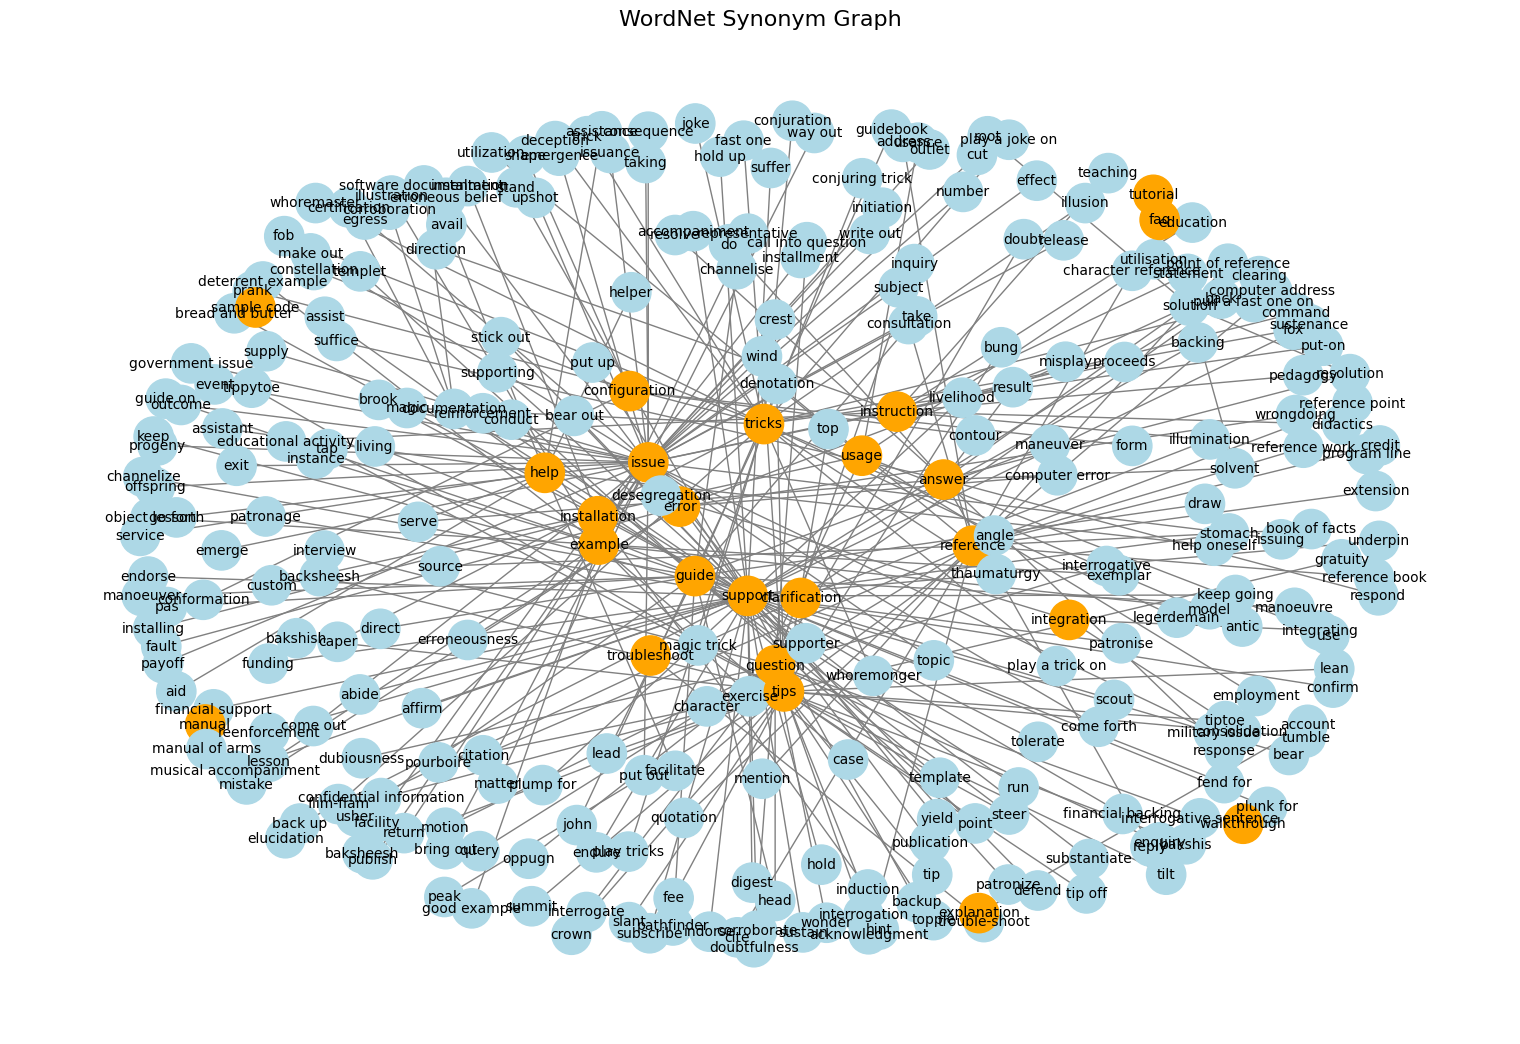

In [9]:
# Draw the graph
draw_graph(G)